# TASK 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data from Premier League
Seasons including 2018/2019, 2019/2020 and 2020/2021

In [2]:
data_2021 = pd.read_csv("C:/IE582/data/E0.csv")
data_1920 = pd.read_csv("C:/IE582/data/E1.csv")
data_1819 = pd.read_csv("C:/IE582/data/E2.csv")
match_data = pd.concat([data_2021, data_1920, data_1819], ignore_index=True)
match_data.drop(match_data.columns[56:], axis=1, inplace=True)
match_data

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,4.34,1.55,1.72,2.10,1.80,2.13,1.84,2.18,1.76,2.10
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,3.22,2.39,2.20,1.66,2.34,1.68,2.36,1.73,2.24,1.67
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,5.96,9.68,1.53,2.50,1.56,2.60,1.56,2.68,1.52,2.53
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,3.48,3.42,1.90,1.90,2.00,1.91,2.05,1.95,1.97,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,3.57,1.97,1.90,1.90,2.00,1.91,2.02,2.03,1.92,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,E0,12/05/2019,NaN,Liverpool,Wolves,2,0,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,E0,12/05/2019,NaN,Man United,Cardiff,0,2,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825,E0,12/05/2019,NaN,Southampton,Huddersfield,1,1,D,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
826,E0,12/05/2019,NaN,Tottenham,Everton,2,2,D,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1

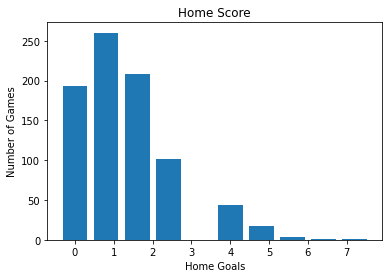

In [3]:
plt.hist(match_data["FTHG"],align="left",rwidth=0.8)
plt.xlabel("Home Goals")
plt.ylabel("Number of Games")
plt.title("Home Score")
plt.show()

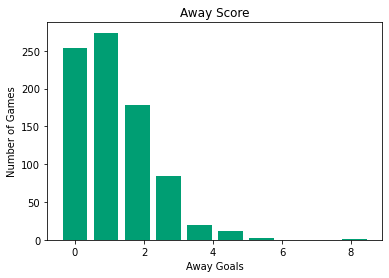

In [4]:
plt.hist(match_data["FTAG"],color="#009E73",align="left",rwidth=0.8)
plt.xlabel("Away Goals")
plt.ylabel("Number of Games")
plt.title("Away Score")
plt.show()

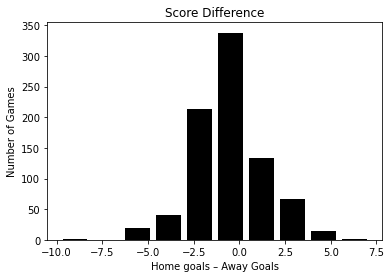

In [5]:
match_data["FTHG"]-match_data["FTAG"]
plt.hist(match_data["FTHG"]-match_data["FTAG"],color="black",align="left",rwidth=0.8)
plt.xlabel("Home goals – Away Goals")
plt.ylabel("Number of Games")
plt.title("Score Difference")
plt.show()

##  Question 2

In [6]:
import statistics as st
from scipy.stats import poisson

home_mean = st.mean(match_data["FTHG"])
away_mean = st.mean(match_data["FTAG"])
home_mean, away_mean

(1.53743961352657, 1.2729468599033817)

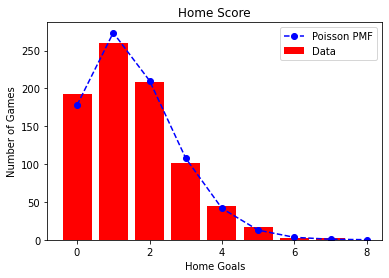

In [7]:
pois = poisson.pmf(np.arange(0,9), home_mean)*len(match_data)
n, bins, patches = plt.hist(match_data["FTHG"], np.arange(9),color='red',align="left",rwidth=0.8,histtype ='bar',label="Data")
plt.plot(bins, pois, color='blue', marker='o', linestyle="dashed",label="Poisson PMF")
plt.xlabel("Home Goals")
plt.ylabel("Number of Games")
plt.title("Home Score")
plt.legend(loc="upper right")
plt.show()

This graph shows that **Home Goals** data distribution looks like *Poisson* distribution with $ \lambda = 1.537 $ . 

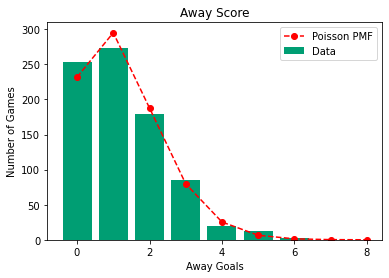

In [8]:
pois = poisson.pmf(np.arange(0,9), away_mean)*len(match_data)
n, bins, patches = plt.hist(match_data["FTAG"], np.arange(9),color='#009E73',align="left",rwidth=0.8,histtype ='bar',label="Data")
plt.plot(bins, pois, color='red', marker='o', linestyle="dashed",label="Poisson PMF")
plt.xlabel("Away Goals")
plt.ylabel("Number of Games")
plt.title("Away Score")
plt.legend(loc="upper right")
plt.show()

This graph shows that **Away Goals** data distribution looks like *Poisson* distribution with $ \lambda = 1.273 $ .